In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Chú giải về các nhãn trong tập dữ liệu CIC IOT 2023
- flow_duration: d  
- header_length: header length
- protocol_type: IP, UDP, TCP, IGMP, ICMP, 
- duration: time to live (thời gian sống)
- rate: rate of tramissions in a flow ( tốc độ truyền trong một luồng)
- srate: rate of outbound packets transmission in a flow (tốc độ truyền ra của các gói tin trong một luồng)
- drate: rate of inbound tramissions in a flow ( tôc độ truyền vào của các gói tin trong một luồng)
- fin_flog_number: fin flag value   (giá trị cờ fin)
- rst_flag_number: rst flag value   (giá trị cờ rst)
- ack_flag_number:   ack flag value ( giá trị cờ ACK)
- ece_flag_number:   ece flag value ( giá trị cờ ECE)
- cwr_floag_number:  cwr flag value ( giá trị cờ CWR)
- ack_count:    number of packets with ack flag set in the the same flow (sô lượng gói tin ack được thiết lập trong một luồng)
- syn_count:    number of packets with flag set in the same 
flow (số lượng gói tin có cờ được thiết lập trong một luồng)
- fin_count: số lượng gói tin cùng với fin trong một luồng
- urg_count: số lượng gọi tin cùng với urg trong một luồng 
- HTTP:     Indicates if the application layer protocol is HTTP ( được chỉ ra nếu giao thức tầng application là HTTP)
- HTTPS:    Indicates if the application layer protocol is HTTPS ( được chỉ ra nếu giao thức tầng application là HTTPS)
- DNS:      Indicates if applicaton layer protocol is DNS
- Telnet:   Indicates if application layer is Telnet
- SMTP:     Indicates if application layer is SMTP
- SSH:      Indicates if application layer is SSH 
- IRC:      Indicates if application layer is IRC
- TCP:      Indicates if application layer is TCP
- UDP:      Indicates if application layer is UDP
- DHCP:     Indicates if application layer is DHCP 
- ARP:      Indicates if application layer is ARP
- ICMP:     Indicates if application layer is ICMP
- IPv:      Indicates if application layer is IPv
- LLC:      Indicates if application layer is LLC
- tot_sum:  summuration ( tổng hợp độ dài gói trong một luồng)
- min: độ dài tổi thiểu gói tin trong một luồng
- max: độ dài lớn nhất gói tin trong một luồng
- avg: độ dài trung bình gói tin trong một luồng
- std: độ lệch chuẩn gói tin trong một luồng 
- tot_size: độ dài gói tin
- IAT: Hiệu thời gian với gói trin trước đó
- number: Số lượng packet trong một luồng
- magnite: (độ dài trung bình gói tin khi vào + độ dài trung bình sau khi ra) / 2
- radius: (phương sai độ dài gói tin đến trong luồng + phượng sai độ dài gói tin ra khỏi luồng ) / 2
- covariance: Hiệu phương sai giữa gói tin đến và gói tin đí
- variance: Phương sai gói tin đến trong luồng / phương sai gói tin ra khỏi luồng
- weight: số lượng gói tin đến * số lượng gói tin đi 
- label: nhãn của cuộc tấn công

In [1]:

col_names = ['flow_duration','Header_Length','Protocol_Type','Duration',
                   'Rate','Srate','Drate','fin_flag_number',
                   'syn_flag_number','rst_flag_number','psh_flag_number','ack_flag_number',
                   'ece_flag_number','cwr_flag_number','ack_count','syn_count','fin_count',
                   'urg_count','rst_count','HTTP','HTTPS','DNS','Telnet','SMTP','SSH','IRC',
                   'TCP','UDP','DHCP','ARP','ICMP','IPv','LLC','tot_sum','Min','Max','AVG',
                   'Std','Tot_size','IAT','Number','Magnitue','Radius','Covariance','Variance','Weight','label']

const_drop_feature = [
    'label',
    'tcp',
                      'ack_count',
                      'https',
                      'fin_flag_number',
                      'syn_flag_number',
                      'psh_flag_number',
                      'rst_flag_number',
                      'fin_count',
                      'http',
                      'ssh',
                      'dns',
                      'llc',
                      'ipv',
                      'arp',
                      'drate',
                      'ece_flag_number',
                      'cwr_flag_number',
                      'dhcp','irc','smtp',
                      'telnet']

for col_name in col_names: 
    if((col_name.lower() in const_drop_feature)):
        continue
    print(col_name)


    

flow_duration
Header_Length
Protocol_Type
Duration
Rate
Srate
ack_flag_number
syn_count
urg_count
rst_count
UDP
ICMP
tot_sum
Min
Max
AVG
Std
Tot_size
IAT
Number
Magnitue
Radius
Covariance
Variance
Weight


Format những dữ liệu là dạng phân loại
Gồm những cột sau SMTP, HTTPS, HTTPS, Telnetl, DNS, SSH, IRC, UDP, ARP, ICMP, IPv, LLC

Phân loại dữ liệu
- Categorical: duration, protocol_type, SMTP, HTTP, HTTPS, Telnet, DNS, SSH, IRC, UDP, ARP, ICMP, IPv, LLC, label
- Numberical: flow_duration, header_length, number, tot_sum, weight, variance

In [12]:
import dpkt
import csv

def log_flow_fields(filename):
    with open(filename, 'r') as pcap_file:
        pcap = dpkt.pcap.Reader(pcap_file)
        for ts, buf in pcap:
            eth = dpkt.ethernet.Ethernet(buf)
            if eth.type == dpkt.ethernet.ETH_TYPE_IP:
                ip = dpkt.ip.IP(eth.data)
                if ip.p == dpkt.ip.IP_PROTO_TCP:
                    tcp = dpkt.tcp.TCP(ip.data)
                    with open('flow_log.csv', 'a', newline='') as csvfile:
                        flow_writer = csv.DictWriter(csvfile, fieldnames=['flow_duration', 'Header_Length', 'Protocol_Type', 'Duration', 'Rate', 'Srate', 'ack_flag_number', 'syn_count', 'urg_count', 'rst_count', 'UDP', 'ICMP', 'tot_sum', 'Min', 'Max', 'AVG', 'Std', 'Tot_size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight'])
                        flow_writer.writerow({
                            'flow_duration': ts,
                            'Header_Length': len(eth.data) + len(ip.data) + len(tcp.data),
                            'Protocol_Type': ip.p,
                            'Duration': tcp.dport,
                            'Rate': tcp.sport,
                            'Srate': ip.ttl,
                            'ack_flag_number': tcp.flags,
                            'syn_count': len(tcp.options),
                            'urg_count': tcp.seq,
                            'rst_count': tcp.ack,
                            'UDP': 0,
                            'ICMP': 0,
                            'tot_sum': ip.sum,
                            'Min': tcp.window,
                            'Max': tcp.urg,
                            'AVG': tcp.opt,
                            'Std': tcp.mss,
                            'Tot_size': len(buf),
                            'IAT': len(ip.opt),
                            'Number': len(tcp.opt),
                            'Magnitue': len(tcp.opt),
                            'Radius': len(tcp.opt),
                            'Covariance': len(tcp.opt),
                            'Variance': len(tcp.opt),
                            'Weight': len(tcp.opt),
                        })

if __name__ == '__main__':
    filename = 'sample.pcap'
    log_flow_fields(filename)

TypeError: a bytes-like object is required, not 'str'

In [4]:
file_path = '../data/part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
file_paths  = [
    '../data/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '../data/part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '../data/part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 
    '../data/part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '../data/part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
]

def grouped_data_from_multiple_file(file_paths = [], col_names = []): 
    
    datas = pd.DataFrame()
    if len(file_paths) == 0:
        raise ValueError('Vui lòng kiểm tra đường dẫn file')
    
    for file_path in file_paths:
        
        data = pd.read_csv(file_path, names= col_names)
           
        if(len(data) == 0): 
            raise ValueError('Dữ liệu trong file ${}'.format(file_path))

        if len(datas) == 0: 
            datas = pd.concat([datas, data])
            continue
    
        if len(datas.columns) != len(data.columns): 
            raise ValueError("Số lượng côt không khóp! Vui lòng kiểm tra dữ liệu của file")
        
        datas = pd.concat([datas, data])
    return datas

data = grouped_data_from_multiple_file(file_paths=file_paths, col_names=col_names)


In [19]:
ORDINARY_LABEL_NAME = 'BenignTraffic'

DDOS_LABEL = ['DDoS-ICMP_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood', 'DDoS-PSHACK_Flood', 'DDoS-SYN_Flood', 'DDoS-RSTFINFlood', 'DDoS-SynonymousIP_Flood', 'DDoS-ICMP_Fragmentation', 'DDoS-ACK_Fragmentation', 'DDoS-UDP_Fragmentation', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris']

DOS_LABEL = ['DoS-UDP_Flood', 'DoS-TCP_Flood', 'DoS-SYN_Flood', 'DoS-HTTP_Flood']

MIRAI_LABEL = ['Mirai-greeth_flood', 'Mirai-udpplain', 'Mirai-greip_flood']

SPOOFING_LABEL = ['MITM-ArpSpoofing', 'DNS_Spoofing']

RECON_LABEL = ['Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan', 'Recon-PingSweep', 'VulnerabilityScan']

WEB_LABEL = ['SqlInjection', 'BrowserHijacking', 'CommandInjection', 'Backdoor_Malware', 'XSS', 'Uploading_Attack']

BRUTE_FORCE_LABEL = ['DictionaryBruteForce']

PROTOCOL_FIELDS = [
    'HTTP','HTTPS','DNS','Telnet',
    'SMTP','SSH','IRC','TCP',
    'UDP','DHCP','ARP','ICMP','IPv','LLC', 'Number'
]

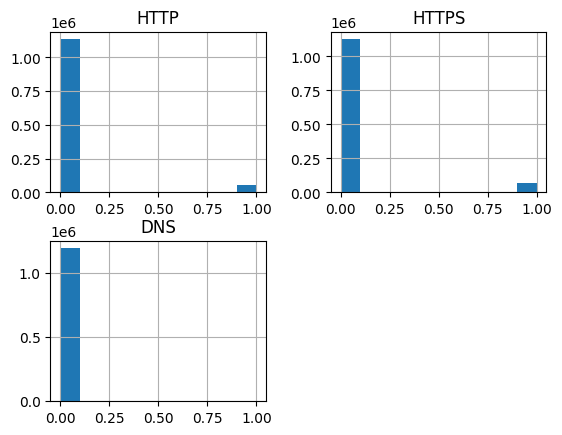

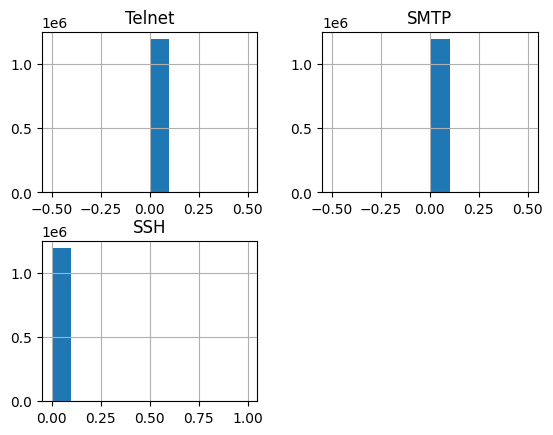

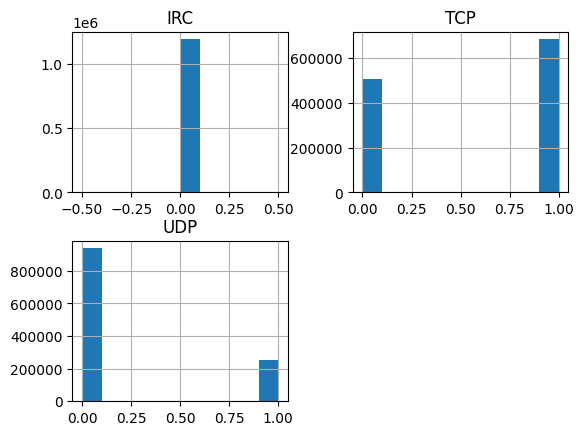

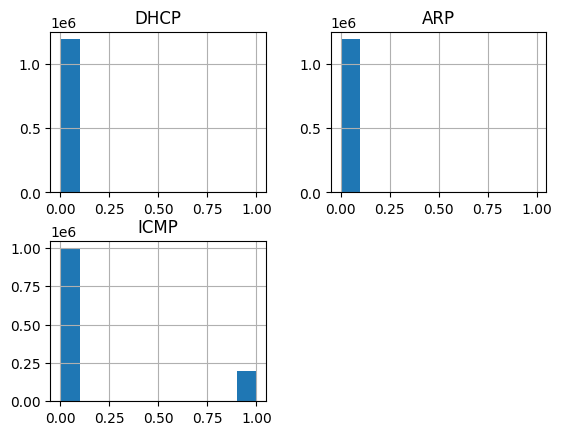

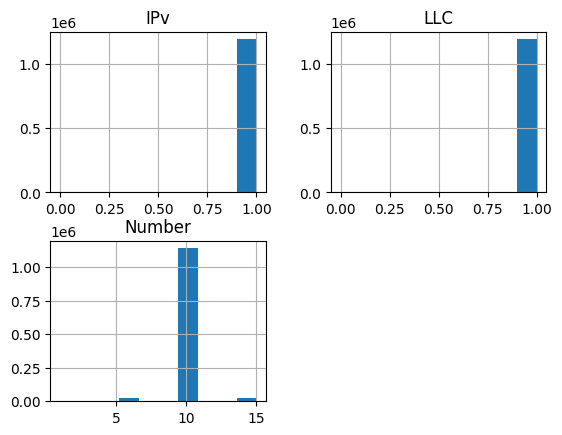

In [20]:
grouped_fields = np.array_split(PROTOCOL_FIELDS, 5)
for grouped_field in grouped_fields: 
    data[grouped_field].hist()

In [21]:
data['Number'].value_counts()

Number
10    1140525
6       24852
14      24645
9         885
8         186
4          49
2          45
1          21
3          19
5          17
7          14
11          3
12          2
15          1
Name: count, dtype: int64

- Ở những cột DNS, Telnet, SMTP, SSH, IRC, UDP, DHCP, ARP, IPv, LLC
=> có thể xem xét bỏ đi nhằm mục đích giảm chiều dữ liệu

### Phân tích dữ liệu từ nhóm 2 lớp
- Lớp bình thường
- Lớp tấn công 

Text(0, 0.5, 'Giá trị')

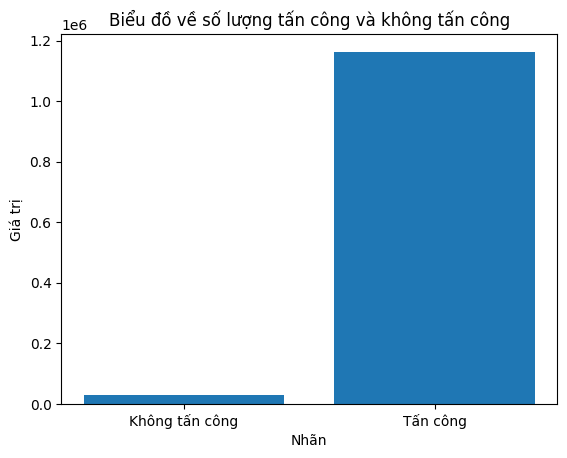

In [7]:
ordinary_label_data = data.groupby('label').get_group(ORDINARY_LABEL_NAME)
attack_label_data =  data.query('label != @ORDINARY_LABEL_NAME')

two_classes_label = ['Không tấn công', 'Tấn công']
two_classes_value = [len(ordinary_label_data), len(attack_label_data)]

plt.bar(two_classes_label, two_classes_value)
plt.title("Biểu đồ về số lượng tấn công và không tấn công")
plt.xlabel("Nhãn")
plt.ylabel("Giá trị")

### Phân tích dữ liệu từ nhóm 7 lớp trong lớp tấn công
- Tấn công DDoS
- Tấn công DoS
- Tấn công Mirai
- Tấn công Recon
- Tấn công Spoofing
- Tấn công web
- Tấn công bruce force

Phân loại nhãn
- Nhóm DDOS: DDoS-ACK_Fragmentation, DDoS-UDP_Fragmentation, DDoS-ICMP_Flood, DDoS-UDP_Flood, DDoS-TCP_Flood, DDoS-PSHACK_Flood, DDoS-SYN_Flood, DDoS-RSTFINFlood, DDoS-SynonymousIP_Flood, 
- Nhóm DOS: DoS-UDP_Flood, DoS-TCP_Flood, DoS-SYN_Flood	
- Nhóm Mirai: Mirai-greip_flood, Mirai-udpplain, Mirai-greeth_flood
- Nhóm Recon: Recon-PingSweep, Recon-OSScan, Recon-PortScan, 
- Nhóm Spoofing: MITM-ArpSpoofing, DNS_Spoofing	
- Nhóm Web: SqlInjection, CommandInjection, Backdoor_Malware, Uploading_Attack, XSS, BrowserHijacking

### Chuẩn hóa dữ liệu

- Dữ liệu ở dạng HTTPS, HTTP, UDP, TCP, LLC, Telnet đang ở dạng FLOAT -> cần được chuyển về thành dạng INT

In [8]:
data[PROTOCOL_FIELDS] = data[PROTOCOL_FIELDS].round().astype(int)

In [9]:
dict_attack_label = {
    'DDoS-ICMP_Flood': 'DDoS',
    'DDoS-UDP_Flood': 'DDoS',
    'DDoS-TCP_Flood': 'DDoS',
    'DDoS-PSHACK_Flood': 'DDoS',
    'DDoS-SYN_Flood': 'DDoS',
    'DDoS-RSTFINFlood': 'DDoS',
    'DDoS-SynonymousIP_Flood': 'DDoS',
    'DDoS-ICMP_Fragmentation': 'DDoS',
    'DDoS-ACK_Fragmentation': 'DDoS',
    'DDoS-UDP_Fragmentation': 'DDoS',
    'DDoS-HTTP_Flood': 'DDoS',
    'DDoS-SlowLoris': 'DDoS',
    'DoS-UDP_Flood': 'DoS',
    'DoS-TCP_Flood': 'DoS',
    'DoS-SYN_Flood': 'DoS',
    'DoS-HTTP_Flood': 'DoS',
    'Mirai-greeth_flood': 'Mirai',
    'Mirai-udpplain': 'Mirai',
    'Mirai-greip_flood': 'Mirai',
    'MITM-ArpSpoofing': 'Spoofing',
    'DNS_Spoofing': 'Spoofing',
    'Recon-HostDiscovery': 'Recon',
    'Recon-OSScan': 'Recon',
    'Recon-PortScan': 'Recon',
    'Recon-PingSweep': 'Recon',
    'VulnerabilityScan': 'Recon',
    'SqlInjection': 'Web',
    'BrowserHijacking': 'Web',
    'CommandInjection': 'Web',
    'Backdoor_Malware': 'Web',
    'XSS': 'Web',
    'Uploading_Attack': 'Web',
    'DictionaryBruteForce': 'Brute Force',
    'BenignTraffic': 'BenignTraffic'
}

attack_label_data['group_label'] = attack_label_data['label'].map(dict_attack_label)

C:\Users\HP\AppData\Local\Temp\ipykernel_3992\2335120268.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_label_data['group_label'] = attack_label_data['label'].map(dict_attack_label)


Nhận thấy trong dữ liệu có những giao thức mạng sau: HTTPS, HTTP, DNS, Telnet, SMTP, SSH, IRC, TCP, UDP, DHCP, ARP, ICMP, IPv, LLC
- Một só cuộc tấn công ở trong nhãn hiện nay của một cuộc tấn công thường sử dụng một trong những giao thức này
 => Có thể giảm chiều dữ liệu dành cho tập dataset này

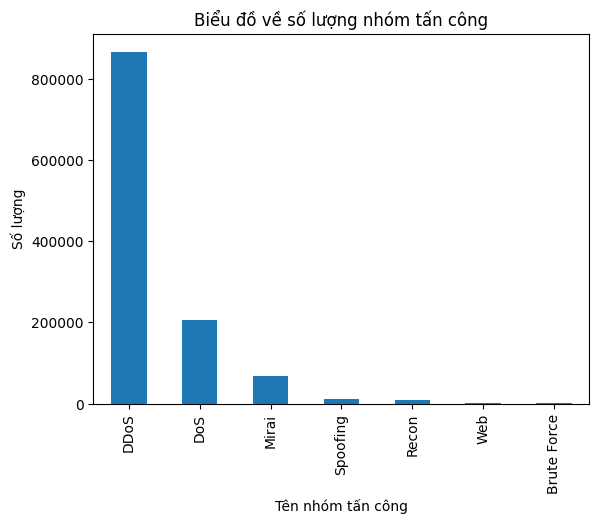

In [10]:
grouped_attack_label_value_counts = attack_label_data['group_label'].value_counts()
grouped_attack_label_value_counts.plot(kind = 'bar')
plt.xlabel('Tên nhóm tấn công')
plt.ylabel('Số lượng')
plt.title('Biểu đồ về số lượng nhóm tấn công')
plt.show()


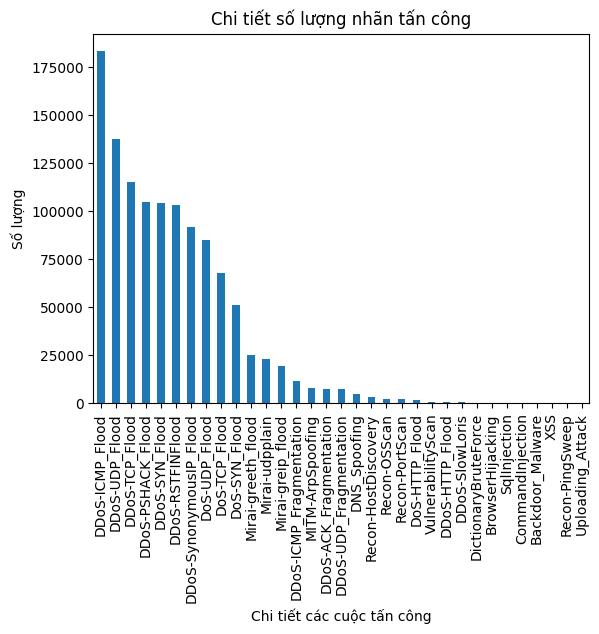

In [11]:
detailed_attack_label_value_count = attack_label_data['label'].value_counts()
detailed_attack_label_value_count.plot(kind = 'bar')
plt.xlabel('Chi tiết các cuộc tấn công')
plt.ylabel('Số lượng')
plt.title('Chi tiết số lượng nhãn tấn công')
plt.show()

### Xây dựng mô hình LSTM để huấn luyện dataset
Ý tưởng: 
- Thực hiện phân thành 2 lớp đó là hợp tấn công và lớp không tấn công
- Nếu mà nhận diện được lớp tấn công thì kiểm tra phân lớp tấn công DDoS

C:\Users\HP\AppData\Local\Temp\ipykernel_3992\1859634637.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_label_data['Header_Length'] = scaler.fit_transform(attack_label_data[['Header_Length']])


<Axes: >

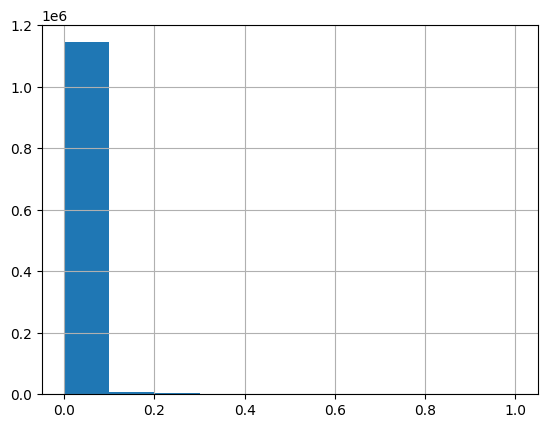

In [12]:
CONST_DROPPED_LABEL = ['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'DHCP', 'ICMP', 'IPv', 'LLC']
dropped_attack_label_data = attack_label_data.drop(CONST_DROPPED_LABEL, axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
attack_label_data['Header_Length'] = scaler.fit_transform(attack_label_data[['Header_Length']])

attack_label_data['Header_Length'].hist()

C:\Users\HP\AppData\Local\Temp\ipykernel_3992\3457795788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinary_label_data['Header_Length'] = scaler.fit_transform(ordinary_label_data[['Header_Length']])


<Axes: >

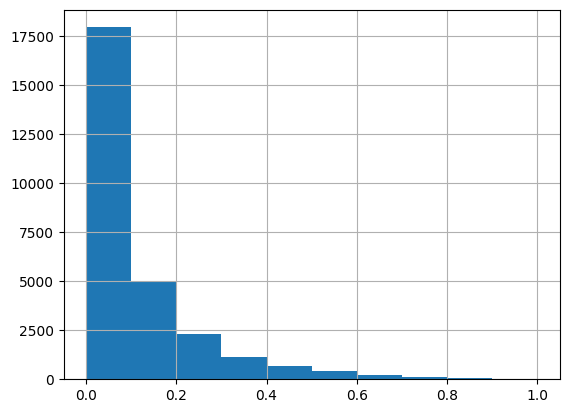

In [13]:
dropped_ordinary_label_data = ordinary_label_data.drop(CONST_DROPPED_LABEL, axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ordinary_label_data['Header_Length'] = scaler.fit_transform(ordinary_label_data[['Header_Length']])
ordinary_label_data['Header_Length'].hist()


<Axes: >

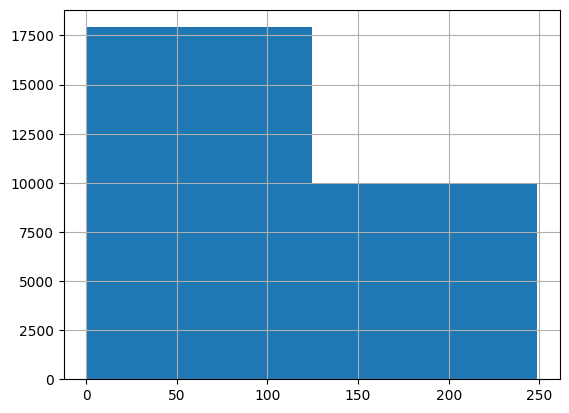

In [14]:
ordinary_label_data['Duration'].hist(bins = 2)

<Axes: >

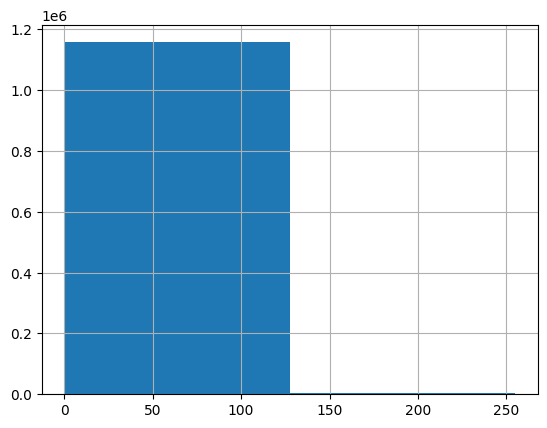

In [15]:
attack_label_data['Duration'].hist(bins = 2)

### Sử dụng mô hình LSTM để phân loại 2 lớp
#### Mục tiêu
- Lớp tấn công
- Lớp bình thường

#### Hướng áp dụng
- Sử dụng nhãn bình thường 0 và nhãn tấn công là 1
- Tìm hiểu các thông số để LSTM phát hiện tấn công hay không tấn công
- Tìm hiểu những vấn đề thường xảy ra trong LSTM



In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from sklearn.model_selection import train_test_split

In [17]:

from sklearn.model_selection import train_test_split

def grouped_two_label(label): 
    if label == ORDINARY_LABEL_NAME: 
        return 0
    
    return 1

data['two_label'] = data['label'].apply(grouped_two_label)
CONST_DROPPED_LABEL = CONST_DROPPED_LABEL + ['label']
dropped_field_of_data = data.drop(CONST_DROPPED_LABEL, axis=1)

dataset =  dropped_field_of_data.values
X_data, Y_data = dataset.iloc[: , 1: -1], dataset.iloc[:, -1]
# print(X_data)
# print(Y_data)
X_data, Y_data = np.array(X_data), np.array(Y_data)

print(X_data.shape, Y_data.shape)
X_train,X_test, Y_train, Y_test  = train_test_split(X_data, Y_data, test_size=0.2)

model = Sequential()
model.add(LSTM(units=64, input_shape=( 1, X_train.shape[1])))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer="adam", metrics=['accuracy'], loss="binary_crossentropy")
model.summary()
model.fit(X_train, Y_train, epochs=16, batch_size=64, validation_data=(X_test[0], Y_test[0]))  
# Chỉnh sửa dòng này
# loss, accuracy = model.evaluate(X_test, Y_test)
# print(loss, accuracy)
# train_data, test_data = train_test_split(dropped_field_of_data, test_size=0.2, random_state=42)
# X_train = train_data.loc[:, train_data.columns != 'two_label']
# Y_train = train_data['two_label']

# X_test = test_data.loc[:, test_data.columns != 'two_label']
# Y_test = test_data['two_label']


# Convert the training and testing data to numpy arrays
# X_train = X_train.values
# Y_train = Y_train.values
# X_test = X_test.values
# Y_test = Y_test.values

# Reshape the input data to fit the LSTM input shape (samples, time steps, features)
# print(X_train)
# print(X_train.shape[0])
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[2]))
# X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[2]))

# model = Sequential()
# model.add(LSTM(units=64, input_shape=(1, X_train.shape[2])))
# model.add(Dense(units=1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.summary()
# model.fit(X_train, Y_train, epochs=30, batch_size=32)

# loss, accuracy = model.evaluate(X_test, Y_test)
# print('Test Loss:', loss)
# print('Test Accuracy:', accuracy)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
# Lấy một dòng từ X_test (ví dụ lấy dòng đầu tiên)
sample_row = X_test[0]

# Reshape dòng thành (1, 1, features) để phù hợp với input shape của mô hình LSTM
sample_row = np.reshape(sample_row, (1, 1, X_test.shape[2]))

# Thực hiện dự đoán ý định trên dòng này
prediction = model.predict(sample_row)

# Lấy nhãn dự đoán (0 hoặc 1)
predicted_label = int(np.round(prediction[0][0]))

# In kết quả dự đoán
print("Predicted Label:", predicted_label)

IndexError: tuple index out of range

In [2]:
import pandas as pd

# Tạo DataFrame mẫu
data = {'label': ['A', 'B', 'C', 'D', 'E', 'F', 'G']}
df = pd.DataFrame(data)
CON_LABEL = ['A', 'B', 'C']
# Chia thành 2 nhóm dựa trên giá trị cột nhãn
group1 = df[df['label'].isin(CON_LABEL)]
group2 = df[~df['label'].isin(['A', 'B', 'C'])]

# In kết quả
print("Nhóm 1:")
print(group1)
print("\nNhóm 2:")
print(group2)

Nhóm 1:
  label
0     A
1     B
2     C

Nhóm 2:
  label
3     D
4     E
5     F
6     G


In [ ]:
# print(len(data_test))
# print(len(X_data_ordinary_test))

NameError: name 'data_test' is not defined

In [ ]:
def group_label_test(label):
    if label == ORDINARY_LABEL_NAME: 
        return 0
    
    return 1

file_paths_test = [
     '../data/part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
]
data_test = grouped_data_from_multiple_file(file_paths=file_paths, col_names=col_names)
data_ordinary_test = data_test.query('label != @ORDINARY_LABEL_NAME')

X_data_ordinary_test = data_ordinary_test.drop(CONST_DROPPED_LABEL + ['label'], axis=1)
Y_data_ordinary_test = data_ordinary_test['label'].apply(group_label_test)


X_data_ordinary_test = X_data_ordinary_test.values
Y_data_ordinary_test = Y_data_ordinary_test.values

X_data_ordinary_test = np.reshape(X_data_ordinary_test, (X_data_ordinary_test.shape[0], 1, X_data_ordinary_test.shape[1]))


# loss, accuracy = model.evaluate(X_data_ordinary_test, Y_data_ordinary_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

36357/36357 [==============================] - 161s 4ms/step - loss: 0.0181 - accuracy: 0.9906
Test Loss: 0.018117355182766914
Test Accuracy: 0.9905509352684021
